<a href="https://colab.research.google.com/github/TUIlmenauAMS/GVT_Lecture_Colab/blob/main/GVT_V6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lecture Fundamentals of Video Technology**

## Gerald Schuller

## Gerald.schuller@tu-ilmenau.de

#**The “Discrete Cosine Transform” (DCT)**
We saw: The DFT produces a complex-valued spectrum, which is symmetric at its center (the Nyquist frequency), when we have real-valued signals. 

Due to this symmetry we could actually **focus on** the spectral-coefficients on the **first half of our spectrum**, and so we would have a twice as high frequency resolution.

The complex-valued computation is more complex in an implementation, and for real-valued signals is mostly not necessary. Here, a **real-valued compuation** would be enough.

Both points are addressed by the DCT. It can be seen as a **real-valued version** of DFT , which calculates only the first half of the spectrum, therefore with **double as high spectral coefficient-density**.

There is a range of different DCT types. The common type used in **Video coding is so called “DCT Type 2”**.

For our signal $x(n)$ with length N and spectral-coefficients $y(k)$ it is defined as :




 $$y(k) = 
  \begin{cases} 
   \sqrt{\frac{2}{N}}\sum_{n=0}^{N-1}x(n)cos(\frac{π}{N}⋅k⋅(n+0.5)) & \text{for } k =1,...N-1 \\
 ^ \frac{1}{\sqrt{N}}   \sum_{n=0}^{N-1}x(n)    & \text{for } k = 0
  \end{cases}$$


The factors with the root are needed to obtain a so called **“orthogonal” Transformation** (where the inverse transform matrix is the transpose matrix). 

Observe that the DCT coefficients y(k) can also be **negative** for k>0 even for all positve inputs x (because the cosine can become negative)! 

Here the **energy of signal** (the sum of squares of sample values $x(n)$ )  is **equal to the energy of spectral coefficients** (the sum of squares of $y(k)$ ). This is the so called “**Parseval Theorem**”. This concept originally stems from  the Fourier Transform and DFT, which have this property with proper orthogonality factors too.

Note that the DCT also can be written as  matrix-multiplication with a “**Transform Matrix**”,  $T$ , with:

$$x:=[x(0),...,x(N-1)]$$
$$y:=[y(0),...,y(n-1)]$$

$$\begin{equation*}
T = \sqrt{\frac{2}{N}}
\begin{bmatrix}
\frac{1}{\sqrt{2}} & cos(\frac{π}{N}⋅1⋅(0+0.5) & ,..., & cos(\frac{π}{N}⋅(N-1)⋅(0+0.5) \\
. & . &  & . \\
. &  & . & .\\
. &  &  & .\\
\frac{1}{\sqrt{2}} & cos(\frac{π}{N}⋅1⋅(N-1+0.5) & ,..., & cos(\frac{π}{N}⋅(N-1)⋅(N-1+0.5)
\end{bmatrix}
\end{equation*}$$

the DCT is simply a matrix-multiplication:

$$y=x⋅T$$

(The same can also be done for the DFT.)

The **inverse DCT** corresponds to a multiplication of vector **$y$** with **inverse Transform-Matrix**, which in this case, due to the **orthogonality**, is simply the **transposed matrix** :

$$x=y⋅T^{-1}=y⋅T^{T}$$

This corresponds to formula:

$$x(n)=\frac{y(0)}{\sqrt{N}}+\sqrt{\frac{2}{N}}\sum_{k=1}^{N-1}y(k)cos(\frac{π}{N}⋅k⋅(n+0.5))$$

for $n=0,...,N-1$

#**Python DCT Functions:**
In Python, the function “dct” is in the Library “scipy.fftpack”. Accordingly the function for an  orthogonal DCT of type 2 is :


In [4]:
import scipy

y=scipy.fftpack.dct(x,type=2,axis=1,norm='ortho') 

NameError: ignored

The option “type=2” is the default setting too, therefore can be omitted. “axis” specifies in which dimension or direction the DCT should be used . “1” is along the rows.

The orthogonal inverse DCT of type 2 is “idct”:



In [ ]:
x=scipy.fftpack.idct(y,type=2,axis=1,norm='ortho') 

These functions are only 1-dimensional. To obtain a **2-dimensional DCT** , we must first replace all rows by their DCT , and then the columns by their respective DCT. This will be achieved simply with the “axis” argument, with x 2-dimensional now,

In [ ]:
y=scipy.fftpack.dct(x,type=2,axis=1,norm='ortho')
y=scipy.fftpack.dct(y,type=2,axis=0,norm='ortho')

#**Python Examples:**
##**Audio Example:**
At first a 1-dimensional example for the **Audio-Signal of microphone**. It reads blocks of length “dctlen”, computes the DCT through



In [13]:
y=scipy.fftpack.dct(samples[0:dctlen])

NameError: ignored



and converts its magnitude in dB, with:


In [ ]:
20*np.log10(np.abs(y)))

These dB values for every DCT coefficient respective every subband are displayed then as live plot :

*python pyrecdctanimation.py*

In [18]:
import pandas as pd
import io
from google.colab import files
uploaded = files.upload()

Saving pyrecdctanimation.py to pyrecdctanimation.py


**Attention**: In the horizontal axis we see 1024 DCT coefficients resp. subbands. These are now **no longer symmetric** around the center but the Nyquist frequency is now on right end. Thus we use our DCT **coefficients optimal** (nothing is double).

**Note**: With whistling, like with the FFT, we obtain peaks in  spectrum, hence the principle of spectral decomposition  remains the same.

##**Video example:**
We apply the DCT to a whole frame (the “Green” component), first to the rows , then to the columns, then we compute the magnitude and display it, with:

In [16]:
import cv2
import numpy as np
import scipy.fftpack as sft

cap = cv2.VideoCapture(0)
[retval, frame] = cap.read()

frame=sft.dct(frame[:,:,1]/255.0,axis=1,norm='ortho') 
frame=np.abs(sft.dct(frame,axis=0,norm='ortho'))

TypeError: ignored

Implemented in:

*python videorecdctdisp.py*



In [17]:
import pandas as pd
import io
from google.colab import files
uploaded = files.upload()

Saving videorecdctdisp.py to videorecdctdisp.py


**Observe**: Like for the case of the DFT, the **brightness** in the display indicates the **magnitude** of a frequency component, its **position** in the display indicates its **frequency**.

**Observe**: Similar to the Audio example we observe **no** longer the **symmetry**. The whole frame is used and no duplication is there. By holding a fine pattern in front of our camera again it shows the typical point-chain pattern, like with the FFT. The **basic function remains therefore the same**.

#**Example of DCT low pass-filter:**
We can now **implement** a low pass filter in the DCT domain, similar to the FFT, by the use of an **appropriate mask**. We just have to consider that there is no longer the symmetry in the spectrum. Thus the mask design becomes even simpler. We now use vectors, which at the beginning consist of ones in the pass band, and then zeros in the stop band.

##**In Python:**

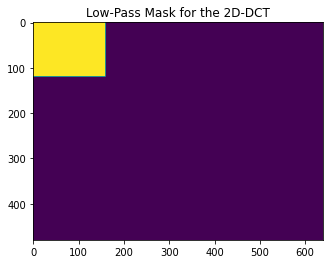

In [5]:
import numpy as np
import matplotlib.pyplot as plt
#import cv2
r=480
c=640
#For rows: 
Mr=np.ones((r,1)) 
Mr[int(r/4.0):r,0]=np.zeros(int(3.0/4.0*r)) 
#For columns: 
Mc=np.ones((1,c)) 
Mc[0,int(c/4.0):c]=np.zeros(int(3.0/4.0*c)); 
#Together: 
M=np.dot(Mr,Mc)
plt.imshow(M)
plt.title("Low-Pass Mask for the 2D-DCT")
plt.show()

**We see**: We only need to define in the upper left edge of our pass band , no longer in all edges .Due to the fact that we practically “see” only the upper left quarter of our DFT spectrum, the band pass appears in both dimensions, twice as big.

Implemention with:

*python videorecdct0idctdisp.py*

(Comparison with the FFT:
*python videorecfft0ifftdisp.py*)

**Observe**: We see in fact a low pass filtered video, smoother and more blurred , with “**ringing artefacts**”, therefore **lines along edges**, completely similar to the FFT.

#**Example: Block by Block DCT**
The ringing artefacts occur, because all zero-set DCT coefficients affect the **whole image** through the size of the transform. In this way, we can no longer process **parts of of frames independent from other parts**. This becomes more important in video coding, for the so called “motion compensation”. Therefore in the MPEG video coders, and also in the JPEG image coders, a DCT of size of **8 pixels x 8 pixels** is used. There the image is first divided into a “Mosaic” of **blocks of size 8 pixels x 8 pixels**, and then  the 2-dimensional DCT is applied separately to each of these blocks.

We could achieve this block-wise application of the DCT with use of  a “for” loop, but this would be very slow in Python. To implement this **block-wise processing**, we instead apply a trick: We reshape our frames to a **width of only 8 pixels** (and corresponding larger height), where we **wrap** every line **after every 8 pixels**. We apply the DCT to every such row. Afterwards we return it again to the original shape. 

In Python there is a function for that:

In [ ]:
numpy.reshape(Matrix, (new shape))

###**Python Example:**
Example for a block size of 2x2 pixels:

In [6]:
import numpy as np
import scipy.fftpack as sft
F=np.arange(16)*1.0
F=np.reshape(F,(-1,4))
#Original Matrix:
F

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.],
       [12., 13., 14., 15.]])

In [7]:
#Reshape the matrix in rows of width 2:
F=np.reshape(F,(-1,2))
#The “-1” means: as many rows as necessary.
F 

array([[ 0.,  1.],
       [ 2.,  3.],
       [ 4.,  5.],
       [ 6.,  7.],
       [ 8.,  9.],
       [10., 11.],
       [12., 13.],
       [14., 15.]])

we can now apply the **DCT** to this matrix with the argument “axis=1” (for the rows). The function processes **all these rows** automatically: 

In [8]:
Y=sft.dct(F,axis=1,norm='ortho')
Y

array([[ 0.70710678, -0.70710678],
       [ 3.53553391, -0.70710678],
       [ 6.36396103, -0.70710678],
       [ 9.19238816, -0.70710678],
       [12.02081528, -0.70710678],
       [14.8492424 , -0.70710678],
       [17.67766953, -0.70710678],
       [20.50609665, -0.70710678]])

Y now contains the DCT coefficients of each row.

Following this we can apply our **filter-mask** for the rows. We multiply every row with the corresponding value of the row-mask. We can implement it through **matrix multiplication**, such that we multiply a diagonal matrix from right hand side, which contains the row-mask on its diagonal,

In [9]:
Mr=np.array([1,0])
Y=np.dot(Y,np.diag(Mr))
Y 

array([[ 0.70710678,  0.        ],
       [ 3.53553391,  0.        ],
       [ 6.36396103,  0.        ],
       [ 9.19238816,  0.        ],
       [12.02081528,  0.        ],
       [14.8492424 ,  0.        ],
       [17.67766953,  0.        ],
       [20.50609665,  0.        ]])

Following this we reshape the matrix back to its original width,

In [10]:
Y=np.reshape(Y,(-1,4)) 
Y 

array([[ 0.70710678,  0.        ,  3.53553391,  0.        ],
       [ 6.36396103,  0.        ,  9.19238816,  0.        ],
       [12.02081528,  0.        , 14.8492424 ,  0.        ],
       [17.67766953,  0.        , 20.50609665,  0.        ]])

Then we need to apply the DCT along the columns. For the reshaping **in columns** of the block-length we can use the same approach, if we apply it simply to the **transposed matrix** (because here the rows and column-indices are simply interchanged), hence we get the same steps as above, just on the transpose matrix,

In [12]:
Y=Y.T
Y=np.reshape(Y,(-1,2))
Y=sft.dct(Y,axis=1,norm='ortho')
Mc=np.array([1,0])
Y=np.dot(Y,np.diag(Mc))
Y=np.reshape(Y,(-1,4))
Y=Y.T
Y

array([[ 3.53553391,  0.        ,  6.36396103,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [14.8492424 ,  0.        , 17.67766953,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

This matrix Y now contains the **DCT coefficients** of our **blocks** of size 2x2 pixels, including the application of our **low pass mask**! Here, just the “DC”value remains for every block .

##**Python example to Video low pass-Filtering with Block by block DCT:**
Implementation with :

*python videorecdctblocks0idctdisp.py*

In [19]:
import pandas as pd
import io
from google.colab import files
uploaded = files.upload()

Saving videorecdctblocks0idctdisp.py to videorecdctblocks0idctdisp.py


**Observe**: In the original we see the 8x8 pixel block raster as white grid. 

In the 2D-DCT image we now see many small 2D-DCT-spectra, corresponding to the 8 pixel x 8 pixel block division.

In the resulting video of the inverse 2D DCT the  ringing artifacts indeed disappeared, but now we have “blocking” artifacts, which are familiar artifacts from MPEG and JPEG Coding. 

Here we have now decreased the number of DCT coefficients by a factor of 4*4=16 (good compression), but at the price of these artifacts. When we keep more DCT coefficients, we will get better quality.

For **color**, this processing is done separately for the **Y-component** and the downsampled **color components** U, V , or Cr, Cb, downsampled e.g. according to the 4:2:0 scheme.

For transmission or storage we need to convert the subband values into bits, and for that we need to apply quantization. We can now simply quantize a suitable subset of **DCT coefficients** resp. **subband values, and transfer them to decoder**. Because the DCT decomposes our image into different spatial frequency components, we can choose the quantization step size according to the Contrast Sensitivity Function of the eye, which tells us the sensitivity of the eye for each spatial frequency component, in such a way that the eye does not see quantization artifacts.